# Lab 1

## Basic idea for gradient descent
### Not logistic regression classifier

In [1]:
def neuron(input, weights):
    out = 0
    for i in range(len(input)):
        out += (input[i] * weights[i])
    return out

# 
def ele_mul(scalar, vector):
    out = [0,0,0]
    for i in range(len(out)):
        out[i] = vector[i] * scalar
    return out

In [2]:
feature1 = [8.5, 9.5, 9.9, 9.0]
feature2 = [0.65, 0.8, 0.8, 0.9]
feature3 = [1.2, 1.3, 0.5, 1.0]

win_or_lose_binary = [1, 1, 0, 1]

# y
true = win_or_lose_binary[0]

# Alpha is the learning rate
alpha = 0.01
weights = [0.1, 0.2, -.1]
input = [feature1[0], feature2[0], feature3[0]]

for iter in range(3):
    # yhat
    pred = neuron(input, weights)
    
    # Mean squared loss function
    error = (pred - true) ** 2
    
    # loss calculation
    delta = pred - true
    
    
    weight_deltas = ele_mul(delta, input)
    
    print("Iteration: " + str(iter+1))
    print("Pred: "+ str(pred))
    print("Error: " + str(error))
    print("Delta: " + str(delta))
    print("Weights: " + str(weights))
    print("Weight_Deltas: " + str(weight_deltas))
    print()
    
    for i in range(len(weights)):
        # change the weights by the alpha * how much each weight needs to change
        weights[i] -= alpha*weight_deltas[i]
        

Iteration: 1
Pred: 0.8600000000000001
Error: 0.01959999999999997
Delta: -0.1399999999999999
Weights: [0.1, 0.2, -0.1]
Weight_Deltas: [-1.189999999999999, -0.09099999999999994, -0.16799999999999987]

Iteration: 2
Pred: 0.9637574999999999
Error: 0.0013135188062500048
Delta: -0.036242500000000066
Weights: [0.1119, 0.20091, -0.09832]
Weight_Deltas: [-0.30806125000000056, -0.023557625000000044, -0.04349100000000008]

Iteration: 3
Pred: 0.9906177228125002
Error: 8.802712522307997e-05
Delta: -0.009382277187499843
Weights: [0.11498061250000001, 0.20114557625, -0.09788509000000001]
Weight_Deltas: [-0.07974935609374867, -0.006098480171874899, -0.011258732624999811]



## Linear Regression Classifier

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('diabetes.csv', sep=',', header='infer')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
raw_data = df.to_numpy()

data = np.transpose(raw_data)

data[8] # training labels (Y)

data.shape

(9, 768)

In [131]:
# Note: slice upper bound is exclusive
raw_training_data = data[:, :]
raw_testing_data = data[:, 500:]

print("Raw: ", raw_training_data[:, 0])

from sklearn import preprocessing

training_data = preprocessing.scale(raw_training_data[0:8, :], axis=0) # ~68%
testing_data = preprocessing.scale(raw_testing_data[0:8, :], axis=0) # ~68%

# min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# training_data = min_max_scaler.fit_transform(raw_training_data[0:8, :]) # ~61%
# testing_data = min_max_scaler.fit_transform(raw_testing_data[0:8, :]) # ~61%

print("Training data size: ", training_data.shape)
print("Testing data size: ", testing_data.shape)

training_data[:, 0]

Raw:  [  6.    148.     72.     35.      0.     33.6     0.627  50.      1.   ]
Training data size:  (8, 768)
Testing data size:  (8, 268)


array([-0.804065  ,  2.26906711,  0.62429218, -0.17645351, -0.93391565,
       -0.206752  , -0.92034626,  0.14817312])

In [132]:
iteration_vec = []
loss_vec = []
def store_loss(loss, iteration):
    iteration_vec.append(iteration)
    loss_vec.append(loss)

In [133]:
# sigmoid activation function
def sigmoid(input_vector, weight_vector, bias):
    z = np.dot(input_vector, weight_vector) + bias
    return 1.0 / (1.0 + np.exp(-z))


# loss function
def wierd_broken_loss(y, yhat):
    return (-y * np.log(yhat) - (1 - y) * np.log(1 - yhat))

def loss(y, yhat):
    #if yhat == 1.0:
    #    return 1.0
    #if yhat == 0:
    #    return 0.0
    return -(y * np.log(yhat) + (1-y) * np.log(1-yhat))

# From lab sheet tutorial
def loss_other(y, h):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# Derivative of sigmoid
def dz_calc(pred, actual):
    return pred - actual
    
def update_dweights(features, dz, derivative_weights):
    for i in range(len(derivative_weights)):
        derivative_weights[i] += features[i] * dz
    return derivative_weights

def update_bias(db, dz):
    db += dz
    return db

# Init random weights and bias
weights = np.random.rand(training_data.shape[0])
initial_weights = weights
bias = np.random.rand(1)

### Gradient Descent algorithm from slides

In [151]:
weights_old = np.array([ 0.7922078, 0.45199038, -0.08072242, 0.48454824, 0.505596, 0.5769389, 0.76302185, 0.50641925])
weights_old_a = np.array([3.40068449, 0.4333755, -0.55011185, 0.22646619, 0.40094553, 1.27276349, -0.72093493, -0.46318842])
weights = np.array([ 6.10375658, 0.43798321, -0.57367969, 0.22779496, 0.41117947, 1.41204838, -3.16402027, -0.85506265])
bias = 1.4121690269083802

def train_network(iterations, weights, bias):

    # Alpha is step size (learning rate)
    alpha = 0.6

    # m is the amount of training data
    m = training_data.shape[1]

    for j in range(iterations):
        
        # l is the average of all the losses
        l = 0.0
        
        # all derivitive weights and deriviative bias start at 0
        derivative_weights = np.zeros(training_data.shape[0])
        db = 0.0

        for i in range(m):
            # grab features
            features = training_data[0:8, i]
            # make prediction
            yhat = sigmoid(features, weights, bias)
            # get actual value
            y = raw_training_data[8, i]
            # calculate the loss
            l += loss(y, yhat)
            # find the derivative of the activation function
            dz = dz_calc(yhat, y)
            # calculate the deriviative of each weight and the bias
            for k in range(len(derivative_weights)):
                derivative_weights[k] += features[k] * dz
            db += dz

        # Calculate average for loss, derivarive bias, and all derivative weights
        l /= m
        for i in range(len(derivative_weights)):
            derivative_weights[i] /= m
        db /= m
        
        store_loss(l, j)

        # Update weights with the derivative weight by learning rate
        for i in range(len(weights)):
            weights[i] = weights[i]-alpha*derivative_weights[i]
        bias = bias - alpha*db
        
        

        if j%10 == 0:
            print("Weight derivatives: ", derivative_weights)
            print("Weights on iteration ", j, ": ", weights)
            print("Loss: ", l)
        
        elif j == iterations-1:
            print("Weight derivatives: ", derivative_weights)
            print("Weights on iteration ", j+1, ": ", weights)
            print("Loss: ", l)
            print("Bias: ", bias)
        

# clear loss_vec && iterations_vec
iteration_vec = []
loss_vec = []

train_network(400, weights, bias)
last_train = weights

Weight derivatives:  [-1.17674521e-02  1.96462617e-02  4.67308009e-03 -1.17414589e-02
  1.94553323e-02 -4.65557435e-05 -1.21027751e-02 -8.11643221e-03]
Weights on iteration  0 :  [ 6.11081705  0.42619545 -0.57648354  0.23483984  0.39950627  1.41207631
 -3.1567586  -0.85019279]
Loss:  0.6027378053419178
Weight derivatives:  [ 0.00099273 -0.00030193 -0.00041125 -0.00452793  0.00099918  0.00461649
  0.00147192 -0.00283921]
Weights on iteration  10 :  [ 6.1082661   0.42938754 -0.57056179  0.26418606  0.37322057  1.38707742
 -3.1624541  -0.82912182]
Loss:  0.6016515359274685
Weight derivatives:  [ 0.00094523 -0.0001738  -0.00014959 -0.00416405  0.00025943  0.00456973
  0.00138053 -0.00266747]
Weights on iteration  20 :  [ 6.10238192  0.43054047 -0.56918191  0.29013074  0.37058439  1.35940962
 -3.17105144 -0.8128138 ]
Loss:  0.601340850502714
Weight derivatives:  [ 8.45841883e-04 -2.08026119e-04 -7.14912900e-05 -3.83820618e-03
  1.96700760e-04  4.43330771e-03  1.25055658e-03 -2.60868335e-03]

Weight derivatives:  [ 1.48562254e-04 -1.89006958e-04 -8.79329265e-05 -7.70043517e-04
 -9.25370484e-06  1.85469980e-03  6.39166750e-05 -1.01094162e-03]
Weights on iteration  280 :  [ 6.04616552  0.46775344 -0.56373437  0.58359656  0.36211333  0.88551205
 -3.2479508  -0.53345574]
Loss:  0.5984145269024701
Weight derivatives:  [ 1.44599647e-04 -1.84902148e-04 -8.92611314e-05 -7.31038486e-04
 -1.03034050e-05  1.78867210e-03  4.90072421e-05 -9.66773822e-04]
Weights on iteration  290 :  [ 6.04528749  0.4688739  -0.56320222  0.58808687  0.36217239  0.87460289
 -3.24828458 -0.52753674]
Loss:  0.5983839510078544
Weight derivatives:  [ 1.41133614e-04 -1.80877567e-04 -9.02644909e-05 -6.94420041e-04
 -1.12011684e-05  1.72493235e-03  3.51068207e-05 -9.24409513e-04]
Weights on iteration  300 :  [ 6.04443156  0.46996999 -0.56266319  0.59235113  0.36223725  0.86408231
 -3.24853227 -0.52187678]
Loss:  0.5983556741960814
Weight derivatives:  [ 1.38113930e-04 -1.76927911e-04 -9.09735373e-05 -6.60004704e

In [149]:
def test_weights(weights, bias):
    m = testing_data.shape[1]
    good_pred = 0

    for i in range(m):
        features = testing_data[0:8, i]
        # make prediction
        yhat = sigmoid(features, weights, bias)
        #print("Prediction", yhat)
        # get actual value
        y = raw_testing_data[8, i]
        #print("Actual", y)

        #if np.isclose(y, yhat):
        #    print("TRUE")
        #    good_pred += 1
        
        if yhat < 0.5 and y == 0.0:
            good_pred += 1
        elif yhat >= 0.5 and y == 1.0:
            good_pred += 1

    print("Good predictions: ", good_pred)
    print("Total predictions: ", m)
    
    print(good_pred/m*100, "%")
        
test_weights(weights, bias)

Good predictions:  185
Total predictions:  268
69.02985074626866 %


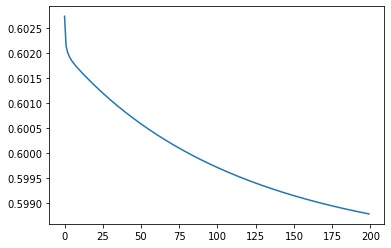

In [150]:
import matplotlib.pyplot as pyplot

pyplot.plot(iteration_vec, loss_vec)